# Police Stop Data EDA for CA Cities

According to the Stanford Open Policing Project, there are typically over 50,000 traffic stops a day in the United States. They have collected and released records from millions of those traffic stops. 

Their website can be found here: https://openpolicing.stanford.edu


In this notebook, I will compare and contrast trends in police stop data for cities in California during 2014. The cities I will compare are: Los Angeles, San Diego, San Francisco, San Jose, Long Beach, Oakland, Bakersfield, and Stockton. 

### The Data: 

The data was available through the Stanford Open Policing Project. The data can be found here: https://openpolicing.stanford.edu/data/

The merged data has 12 fields:  
* Date, time, lat, lng, subject age, subject race, type (vehicular or pedestrian), outcome (warning, citation or arrest), contraband_found, search_conducted, and city. 

* Not all cities had all variables recorded.

* All cities have the date, suject race, type and city variables.

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
figsize = (16,8)

In [3]:
# loading the data
df_ca = pd.read_csv('Data/df_all.csv', low_memory=False)

In [4]:
# taking a first look at the data
df_ca.head()

,Unnamed: 0,date,time,lat,lng,subject_age,subject_race,subject_sex,type,outcome,contraband_found,search_conducted,city
0,0,NaN,01:33:00,37.803084,-122.237247,NaN,asian/pacific islander,female,vehicular,citation,NaN,False,Oakland
1,1,NaN,14:48:00,37.767568,-122.196820,NaN,black,male,NaN,NaN,False,True,Oakland
2,2,2013-04-01,00:00:00,37.820598,-122.270734,NaN,white,male,vehicular,warning,False,True,Oakland
3,3,2013-04-01,00:01:00,37.821246,-122.276488,NaN,black,male,vehicular,NaN,NaN,False,Oakland
4,4,2013-04-01,10:41:00,37.802937,-122.271738,NaN,hispanic,female,NaN,citation,NaN,False,Oakland


In [5]:
# Checking the columns in the dataset
df_ca.columns

Index(['Unnamed: 0', 'date', 'time', 'lat', 'lng', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'outcome', 'contraband_found',
       'search_conducted', 'city'],
      dtype='object')

### Cleaning up the Data

In [5]:
# Unnamed: 0 is the same as the indicies so we can drop it
df_ca = df_ca.drop(['Unnamed: 0'], axis = 1)

In [6]:
# checking the row counts to see what rows are missing values
# A lot of columns are missing a lot of variables, but most we do not end up using, or we only visualize for the specific cities that have the variables
# this means we will fill in most of the variables missing a significant amount of rows
df_ca.count()

date                7636058
time                7180616
lat                 1677816
lng                 1677816
subject_age         1823989
subject_race        7628381
subject_sex         7481251
type                7570426
outcome             2033924
contraband_found     152536
search_conducted    1612399
city                7636246
dtype: int64

In [7]:
# I am creating a new hour variable here before we fill in the time column with 'N/A'
# This helps the program because it won't work if it doesn't recognize the 'N/A' as a time 
df_ca['hour'] = pd.DatetimeIndex(df_ca['time']).hour

In [8]:
# Filling in contraband_found, searh_conducted, lat, lng, time, subject_sex, outcome, hour, and subject_age with placevalues
df_ca['contraband_found'].fillna('N/A',inplace=True)
df_ca['search_conducted'].fillna('N/A',inplace=True)
df_ca['lat'].fillna('N/A',inplace=True)
df_ca['lng'].fillna('N/A',inplace=True)
df_ca['time'].fillna('N/A',inplace=True)
df_ca['subject_sex'].fillna('N/A',inplace=True)
df_ca['outcome'].fillna('N/A',inplace=True)
# subject_age is filled with -1, so it will be numeric, but -1 means age is unknown
df_ca['subject_age'].fillna(-1,inplace=True)
df_ca['hour'].fillna(-1,inplace=True)

In [9]:
# Droping rows with missing values
df_ca = df_ca.dropna()
df_ca.reset_index(drop=True, inplace=True)

In [10]:
# Checking the counts again
df_ca.count()

date                7565316
time                7565316
lat                 7565316
lng                 7565316
subject_age         7565316
subject_race        7565316
subject_sex         7565316
type                7565316
outcome             7565316
contraband_found    7565316
search_conducted    7565316
city                7565316
hour                7565316
dtype: int64

In [11]:
# Checking the data types
display(df_ca.dtypes)

date                 object
time                 object
lat                  object
lng                  object
subject_age         float64
subject_race         object
subject_sex          object
type                 object
outcome              object
contraband_found     object
search_conducted     object
city                 object
hour                float64
dtype: object

In [12]:
# Changing the age and hours columns into numerical values
df_ca['subject_age'] = pd.to_numeric(df_ca['subject_age'])
df_ca['hour'] = pd.to_numeric(df_ca['hour'])
# Changing date into a datetime value
df_ca['date'] = pd.DatetimeIndex(df_ca['date'])

In [13]:
# Checking which dates are available for each city
print(df_ca.groupby(['city'])['date'].min())
print('  ')
print('  ')
print(df_ca.groupby(['city'])['date'].max())
print("So we will drop the Santa Anna dataset, and then restrict our data to stops from 2014")

city
Bakersfield     2008-03-09
Long Beach      2008-01-01
Los Angeles     2010-01-01
Oakland         2013-04-01
San Diego       2014-01-01
San Francisco   2007-01-01
San Jose        2013-09-01
Santa Ana       2014-06-25
Stockton        2012-01-01
Name: date, dtype: datetime64[ns]
  
  
city
Bakersfield     2018-03-09
Long Beach      2017-12-31
Los Angeles     2018-06-23
Oakland         2017-12-31
San Diego       2017-03-31
San Francisco   2016-06-30
San Jose        2018-03-31
Santa Ana       2018-04-13
Stockton        2016-12-31
Name: date, dtype: datetime64[ns]
So we will drop the Santa Anna dataset, and keep the data from 2014


In [14]:
# We have consistent data for all three cities from 01/01/2014 - 12/31/2014
# Therefore, we will use data from these dates when comparing the cities
df_ca_final = df_ca[(df_ca['date'] >= '2014-01-01') & (df_ca['date'] <= '2014-12-31')]
df_ca_final.reset_index(drop=True, inplace=True)

In [15]:
# eliminating any stops from Santa Ana
df_ca_final = df_ca_final[df_ca_final['city'] != 'Santa Ana']
df_ca_final.reset_index(drop=True, inplace=True)

In [16]:
# Checking the counts again
df_ca_final.count()

date                1044030
time                1044030
lat                 1044030
lng                 1044030
subject_age         1044030
subject_race        1044030
subject_sex         1044030
type                1044030
outcome             1044030
contraband_found    1044030
search_conducted    1044030
city                1044030
hour                1044030
dtype: int64

In [17]:
df_ca_final['city'].value_counts()

Los Angeles      704705
San Diego        138917
San Francisco     91961
San Jose          32260
Long Beach        23355
Oakland           23062
Bakersfield       22874
Stockton           6896
Name: city, dtype: int64

### Creating New Variables

In [18]:
# Creating a weekday variable
df_ca_final['weekday'] = pd.DatetimeIndex(df_ca_final['date'][df_ca_final['date'] != 'N/A']).weekday

In [19]:
df_ca_final.count()

date                1044030
time                1044030
lat                 1044030
lng                 1044030
subject_age         1044030
subject_race        1044030
subject_sex         1044030
type                1044030
outcome             1044030
contraband_found    1044030
search_conducted    1044030
city                1044030
hour                1044030
weekday             1044030
dtype: int64

### Looking at the Value Counts of the Variables:

In [20]:
# Looking at the total number of stops in each city

df_ca_final['city'].value_counts().sort_index()

Bakersfield       22874
Long Beach        23355
Los Angeles      704705
Oakland           23062
San Diego        138917
San Francisco     91961
San Jose          32260
Stockton           6896
Name: city, dtype: int64

In [21]:
# Looking at the proportion of vehicular to pedestrian stops
# Most of the stops are vehicular stops
# San Francisco does not include pedestrian stops
df_ca_final['type'].value_counts(normalize=True)

vehicular     0.825573
pedestrian    0.174427
Name: type, dtype: float64

In [22]:
# Looking at the proportion of stops of Male vs. Female

print('Proportion of Stops By Gender in Oakland and San Francisco: ')
df_ca_final['subject_sex'].value_counts(normalize=True)

Proportion of Stops By Gender in Oakland and San Francisco: 


male      0.677569
female    0.291426
N/A       0.031006
Name: subject_sex, dtype: float64

In [23]:
# Looking at the proportion of stops of each race

df_ca_final['subject_race'].value_counts(normalize=True)

hispanic                  0.381260
white                     0.275717
black                     0.205888
other                     0.075308
asian/pacific islander    0.060916
unknown                   0.000911
Name: subject_race, dtype: float64

### Visualizing the Variables:

A histogram of the age variable: 

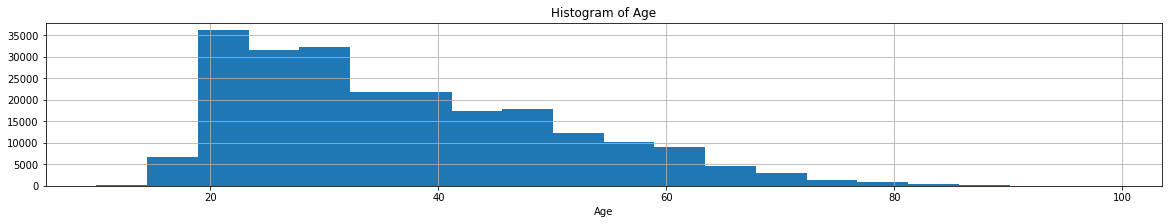

In [24]:
# plot histogram of age
# This matches our value counts of 25-30 being one of the highest areas
# 20-30 also seems like it is higher than other 10 year ranges
df_ca_final['subject_age'][df_ca_final['subject_age']>0].hist(bins=20, figsize=(20,3))
plt.pyplot.xlabel('Age')
plt.pyplot.title('Histogram of Age');

A histogram of the date variable: 

/Users/sarascomputer/anaconda2/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


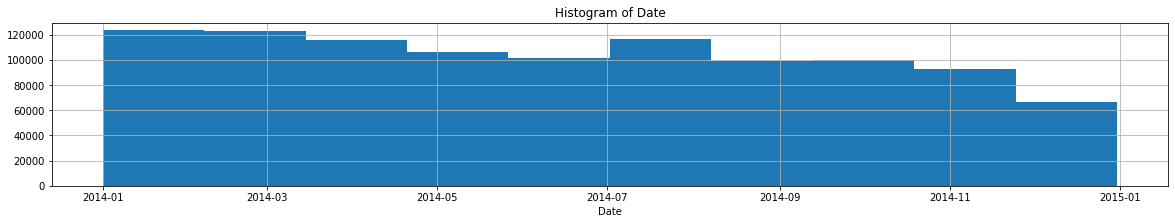

In [25]:
# plot histogram of date
df_ca_final['date'].hist(bins=10, figsize=(20,3))
plt.pyplot.xlabel('Date')
plt.pyplot.title('Histogram of Date');

Creating a Bar Graph of the Percentage of Stops of Each Race in Each City

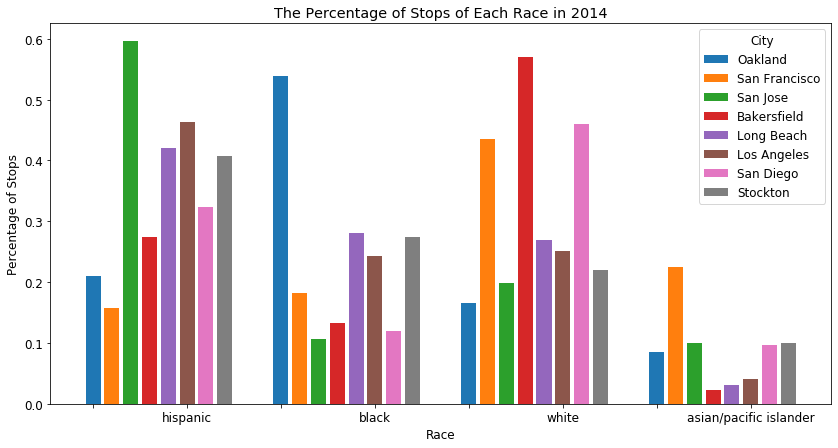

In [26]:
# The percentage of stops of each race in each city

# Updating graph and font sizes
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 12})

# Creating a data subset that excludes stops where the driver race is listed as other or unknown
df_ca_final_race = df_ca_final[(df_ca_final['subject_race']!='other') &  (df_ca_final['subject_race']!='unknown')]

# A helper Function to get the proportion of stops of drivers of each race
def get_proportions_race(df,races):
    lst = []
    for race in races: 
        lst.append(len(df['city'][df['subject_race']==race])/len(df['city']))
    return lst

# A helper Function to get the proportion of stops of drivers in each city
def get_proportions_city(df):
    races = df_ca_final_race['subject_race'].unique().tolist()
    index = 0
    for city in df['city'].unique():
        plt.pyplot.bar(np.arange(4) * 10 + index, get_proportions_race(df_ca_final_race[df_ca_final_race['city']==city],races))
        index = index + 1

# Plotting
fig, ax = plt.pyplot.subplots()
xlabels = [" "," ",'hispanic','', 'black','', 'white','', 'asian/pacific islander']

# Calling the functions
get_proportions_city(df_ca_final)

# Formatting the plot
plt.pyplot.xlabel('Race')
plt.pyplot.ylabel('Percentage of Stops')
plt.pyplot.legend(title = "City",labels = df_ca_final_race['city'].unique())
ax.set_xticklabels(xlabels)
plt.pyplot.title('The Percentage of Stops of Each Race in 2014');
plt.pyplot.savefig('stops_by_race.jpg')

Looking at the Percentage of Stops of Each Gender in Each City

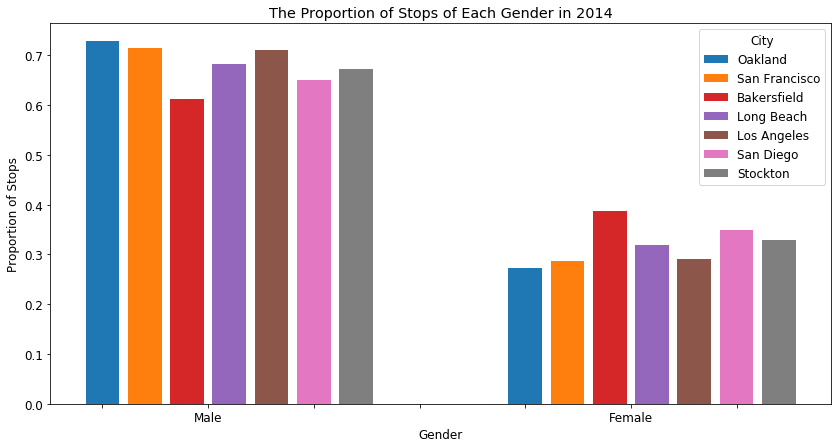

In [28]:
# The percentage of stops of each gender in each city

# creating a data subset that excludes stops where the driver gender is listed as 'N/A'
df_ca_final_gender = df_ca_final[(df_ca_final['subject_sex']=='male') | (df_ca_final['subject_sex']=='female')]

# Helper Function to get the proportion of stops of drivers of each gender
genders = ['male','female']
def get_proportions_gender(df,genders):
    lst = []
    for gender in genders: 
        lst.append(len(df['city'][df['subject_sex']==gender])/len(df['city']))
    return lst

# Helper Function to get the proportion of stops of drivers in each city
def get_proportions_city(df):
    # Changing the colors so they are the same for each city as the previous graph
    colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    index = 0
    for city in df['city'].unique():
        plt.pyplot.bar(np.arange(2) * 10 + index, get_proportions_gender((df[df['city']==city]),genders), color = colors[index])
        index = index + 1

# Creating the plot
fig, ax = plt.pyplot.subplots()

# Calling functions
get_proportions_city(df_ca_final_gender)

# Formatting the plot
plt.pyplot.xlabel('Gender')
plt.pyplot.ylabel('Proportion of Stops')
plt.pyplot.legend(title = "City",labels = df_ca_final_gender['city'].unique())
ax.set_xticklabels(['','','Male','','','','Female'])
plt.pyplot.title('The Proportion of Stops of Each Gender in 2014');
plt.pyplot.savefig('stops_by_gender.jpg')

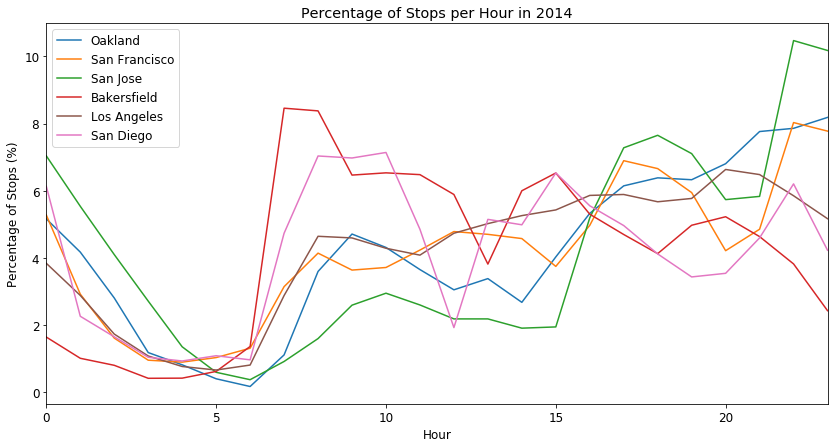

In [30]:
# Calculating what percentage of stops happen during each hour for each city

# Excluding stops where time is <0 (it is -1 when it is unknown or not available)
df_ca_time = df_ca_final[df_ca_final['hour']>=0]

cities = df_ca_time['city'].unique()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
index = 0
for city in cities: 
    s1 = df_ca_time[(df_ca_time['city']==city) ]['hour'].value_counts(normalize=True).mul(100).sort_index()
    s1.plot(color = colors[index])
    index = index + 1
plt.pyplot.legend(df_ca_time['city'].unique())
plt.pyplot.xlabel('Hour')
plt.pyplot.ylabel('Percentage of Stops (%)')
plt.pyplot.title('Percentage of Stops per Hour in 2014');
plt.pyplot.savefig('stops_by_hour.jpg')

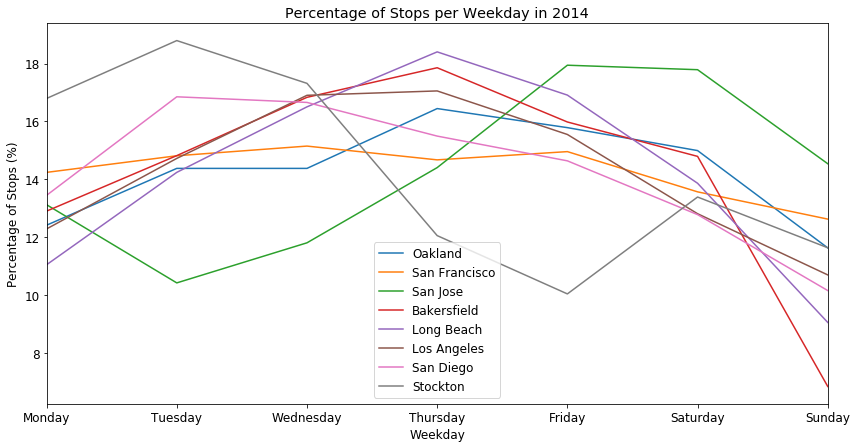

In [33]:
# Calculating what percentage of stops happen during each day of the week for each city
cities = df_ca_final['city'].unique()
for city in cities: 
    s1 = df_ca_final[df_ca_final['city']==city]['weekday'].value_counts(normalize=True).mul(100).sort_index()
    s1.plot()
plt.pyplot.legend(df_ca_final['city'].unique())
plt.pyplot.xlabel('Weekday')
plt.pyplot.ylabel('Percentage of Stops (%)')
plt.pyplot.title('Percentage of Stops per Weekday in 2014');
plt.pyplot.xticks([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.pyplot.savefig('stops_by_weekday.jpg');